# Part I

samplFreq =  7800
nSamples =  78000


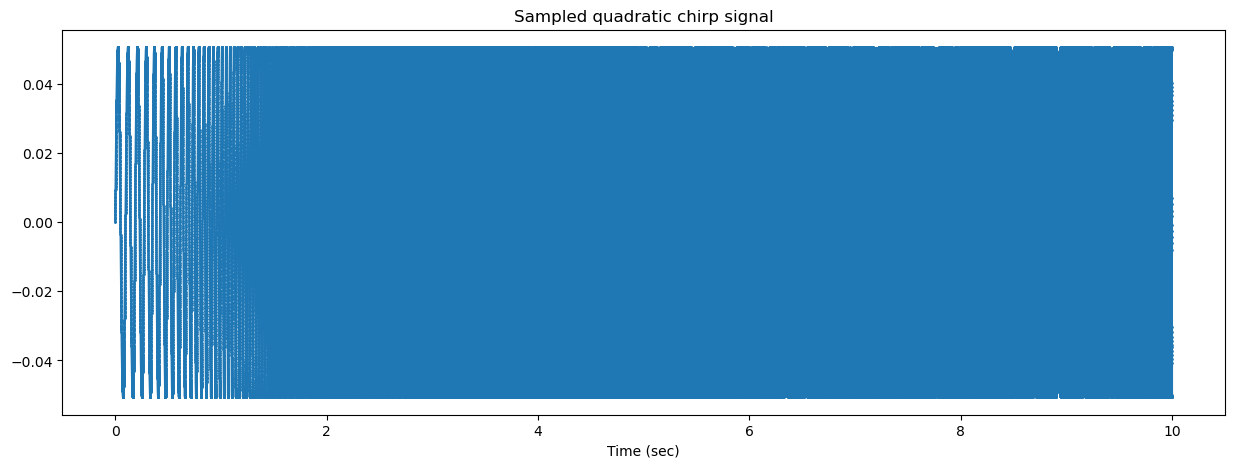

In [1]:
# Plot the quadratic chirp signal

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from signal_templates import gen_quadra_chirp_signal   # Our signal templates

# Signal params
a1 = 10
a2 = 3
a3 = 3
A = 10

# Max frequency
duration = 10.0
T = duration
maxFreq = a1 + 2 * a2 * T + 3 * a3 * T ** 2
nyqFreq = 2 * maxFreq
samplFreq = nyqFreq + 1
samplFreq = int((np.round(samplFreq / 10.0) + 1) * 40) #Sample numbers per second
print('samplFreq = ',samplFreq)
samplIntrvl = 1 / samplFreq

# Sample time array
timeVec = np.arange(0, duration, samplIntrvl)
nSamples = len(timeVec)
print('nSamples = ',nSamples)
# Generate signal
qcCoefs = [a1, a2, a3]
snr = A  
sigVec = gen_quadra_chirp_signal(timeVec, snr, qcCoefs)

# Plot
plt.figure(figsize=(15,5))
plt.plot(timeVec, sigVec, marker='.', markersize=2)
plt.xlabel('Time (sec)')
plt.title('Sampled quadratic chirp signal')
plt.show()

import sounddevice as sd  #Need install sounddevices

# Constrain signal amplitude between [-1, 1]
sigNorm = sigVec / np.max(np.abs(sigVec))

# Play
sd.play(sigNorm, samplerate=int(samplFreq))
sd.wait()  



# Part II

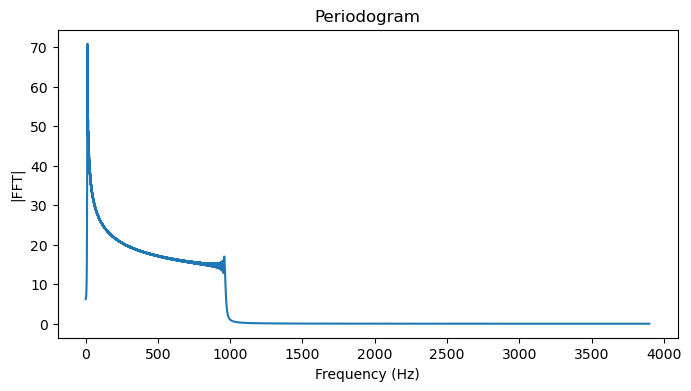

In [2]:
# Plot the perioddogram picture of quadratic chirp signal

import numpy as np
import matplotlib.pyplot as plt
nSamples = len(timeVec)

# Data length（total length of signal）
dataLen = timeVec[-1] - timeVec[0]

# kNyq correspond to DFT
kNyq = nSamples // 2 + 1   # floor(nSamples/2)+1 in Matlab

# PosFreq array
posFreq = np.arange(0, kNyq) * (1 / dataLen)

# FFT transform
fftSig = np.fft.fft(sigVec)

# Select the positive
fftSig = fftSig[:kNyq]

# Plot
plt.figure(figsize=(8, 4))
plt.plot(posFreq, np.abs(fftSig))
plt.xlabel('Frequency (Hz)')
plt.ylabel('|FFT|')
plt.title('Periodogram')
plt.show()

# Advanced Lab Topic 1

## 1 . Time-frequency diagram

In [3]:
#from scipy.signal import spectrogram
#winLen = 0.2   # seconds
#ovrlp = 0.1    # seconds
#winLenSmpls = int(winLen * samplFreq)
#ovrlpSmpls = int(ovrlp * samplFreq)

# 画spectrogram
#F, T, Sxx = spectrogram(sigVec, fs=samplFreq, window='hann',
                        #nperseg=winLenSmpls, noverlap=ovrlpSmpls)

#plt.figure(figsize=(10,5))
#plt.pcolormesh(T, F, np.abs(Sxx), shading='gouraud')
#plt.xlabel('Time (sec)')
#plt.ylabel('Frequency (Hz)')

#plt.title('Spectrogram')
#plt.colorbar(label='|Amplitude|')
#plt.tight_layout()
#plt.show()

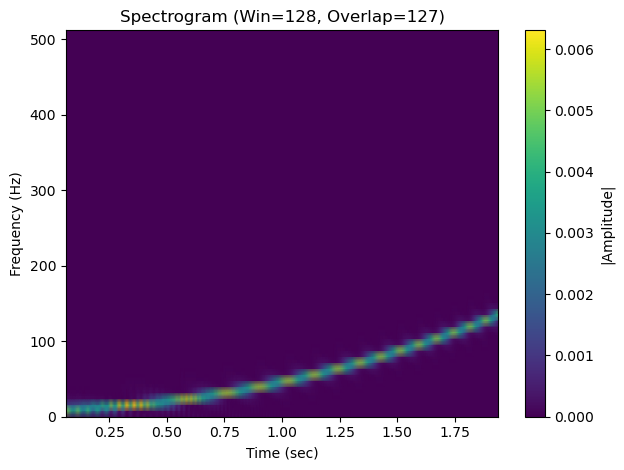

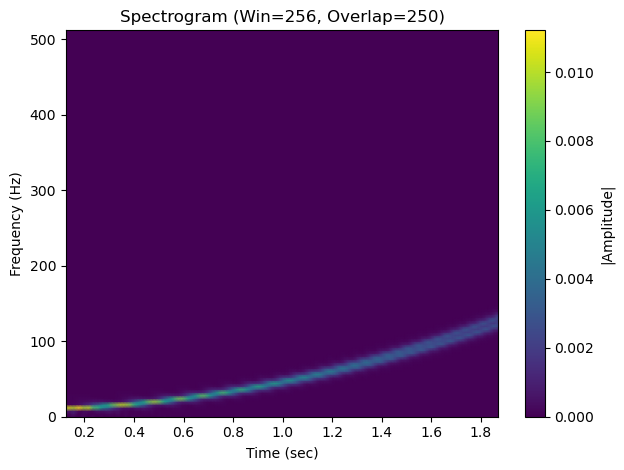

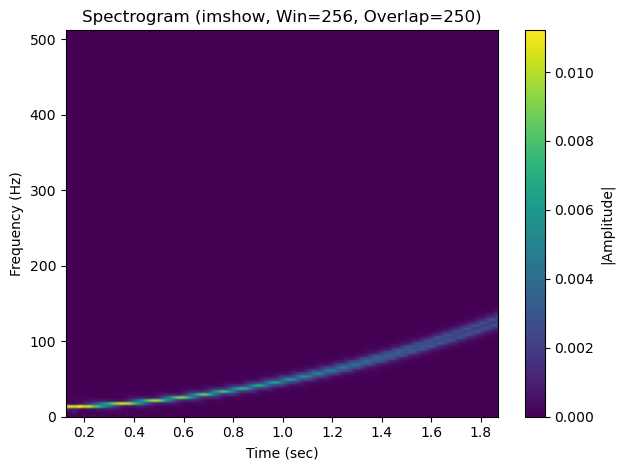

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from signal_templates import gen_quadra_chirp_signal

# Sample params
sampFreq = 1024
nSamples = 2048

# Generate time array
timeVec = np.arange(nSamples) / sampFreq

# Params
a1 = 10
a2 = 3
a3 = 10
A  = 10
qcCoefs = [a1, a2, a3]
snr = A

# Generate discreate signal
sigVec = gen_quadra_chirp_signal(timeVec, snr, qcCoefs)

# Equal to Matlab spectrogram(sigVec, 128,127,[],sampFreq)
winLen1 = 128
ovrlp1  = 127
f1, t1, Sxx1 = spectrogram(sigVec, fs=sampFreq, nperseg=winLen1, noverlap=ovrlp1)
plt.figure()
plt.pcolormesh(t1, f1, np.abs(Sxx1), shading='gouraud')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.title('Spectrogram (Win=128, Overlap=127)')
plt.colorbar(label='|Amplitude|')
plt.tight_layout()

# Same as above
winLen2 = 256
ovrlp2  = 250
f2, t2, Sxx2 = spectrogram(sigVec, fs=sampFreq, nperseg=winLen2, noverlap=ovrlp2)
plt.figure()
plt.pcolormesh(t2, f2, np.abs(Sxx2), shading='gouraud')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.title('Spectrogram (Win=256, Overlap=250)')
plt.colorbar(label='|Amplitude|')
plt.tight_layout()

# Drawing with imagesc 
plt.figure()
plt.imshow(np.abs(Sxx2), aspect='auto', origin='lower',
           extent=[t2[0], t2[-1], f2[0], f2[-1]])
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram (imshow, Win=256, Overlap=250)')
plt.colorbar(label='|Amplitude|')
plt.tight_layout()

plt.show()

## 2 . Filtering

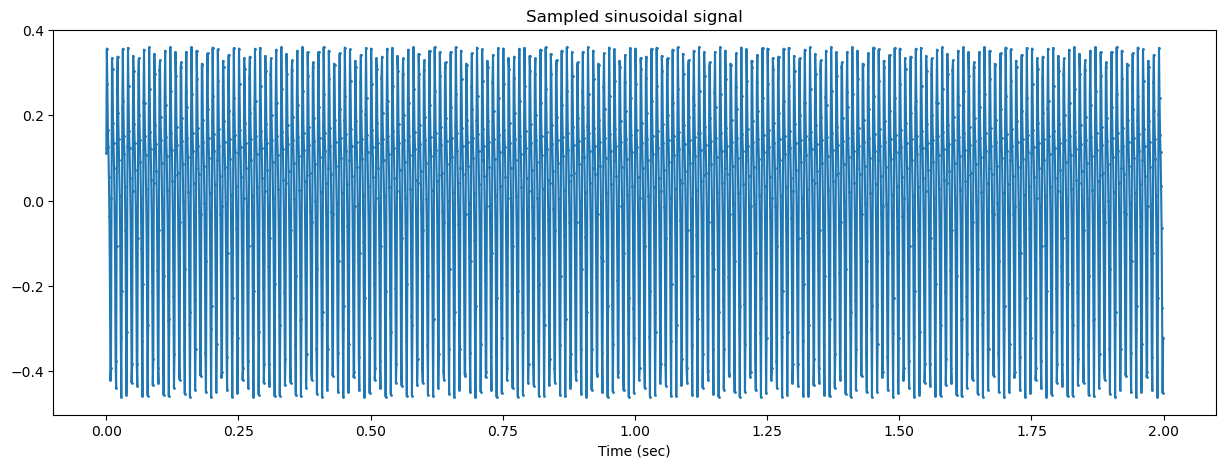

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from signal_templates import gen_sinu_signal   # Our signal templates

# Sample params
sampFreq = 1024
nSamples = 2048

# Generate time array
timeVec = np.arange(nSamples) / sampFreq

# Params
A1 = 10
f01 = 100
phi01 = 0
A2 = 5
f02 = 200
phi02 = np.pi / 6
A3 = 1.5
f03 = 300
phi03 = np.pi / 4

# Generate signal seperately and add
sinCoefs1 = [f01, phi01]
snr1 = A1
sigVec1 = gen_sinu_signal(timeVec, snr1, sinCoefs1)
sinCoefs2 = [f02, phi02]
snr2 = A2
sigVec2 = gen_sinu_signal(timeVec, snr2, sinCoefs2)
sinCoefs3 = [f03, phi03]
snr3 = A3
sigVec3 = gen_sinu_signal(timeVec, snr3, sinCoefs3)

#Total siganl
sigVec = sigVec1 + sigVec2 + sigVec3

# Plot
plt.figure(figsize=(15,5))
plt.plot(timeVec, sigVec, marker='.', markersize=2)
plt.xlabel('Time (sec)')
plt.title('Sampled sinusoidal signal')
plt.show()